## 1. Data Exploration

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/blood_cell_detection/blood_cell_detection.csv')

In [4]:
data.head()

,filename,cell_type,xmin,xmax,ymin,ymax
0,0.jpg,RBC,5,90,249,354
1,0.jpg,RBC,210,323,8,118
2,0.jpg,RBC,158,256,283,394
3,0.jpg,RBC,83,166,399,480
4,0.jpg,RBC,534,635,13,116


In [5]:
data.shape

(4888, 6)

In [6]:
data.filename.unique().shape

(364,)

In [7]:
data.cell_type.unique()

array(['RBC', 'WBC', 'Platelets'], dtype=object)

In [8]:
data.cell_type.value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

Image is of shape (480, 640, 3)


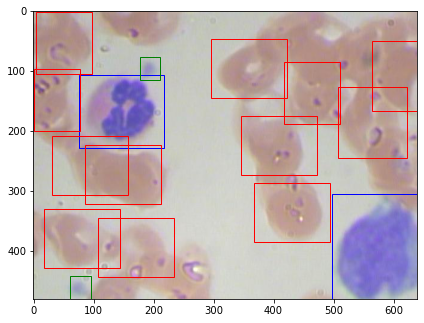

In [9]:
# take random index
idx = rng.choice(range(data.shape[0])) 

# get corresponding image
image = plt.imread('../datasets/blood_cell_detection/images/' + data.iloc[idx].filename.split('.')[0] + '.jpg')

# draw emtpy figure
fig = plt.figure()

# define axis
ax = fig.add_axes([0, 0, 1, 1])

# plot image
plt.imshow(image)
    
# for each row
for _, row in data[data.filename == data.iloc[idx].filename].iterrows():
    # get actual coordinates
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    # find width and height
    width = xmax - xmin
    height = ymax - ymin
    
    # set different bounding box colors
    if row.cell_type == 'RBC':
        edgecolor = 'r'
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
    
    # create rectangular patch
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor=edgecolor, facecolor='none')
    
    # add patch
    ax.add_patch(rect)
    
# print image shape
print('Image is of shape', image.shape)

# show figure
plt.show()

## 2. Data Loading and Preprocessing

In [10]:
# keep only wbc's
data = data.loc[data.cell_type == 'WBC'].copy()

In [11]:


# drop images having more than one wbc
data = data.drop_duplicates(subset=['filename', 'cell_type'], keep=False)

Image is of shape (480, 640, 3)


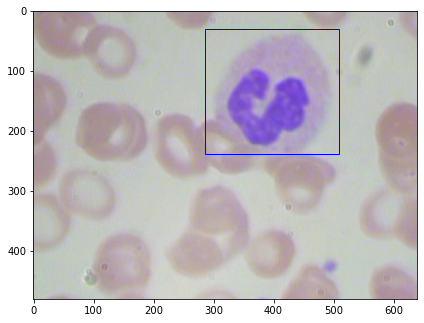

In [12]:
idx = rng.choice(range(data.shape[0])) 

image = plt.imread('../datasets/blood_cell_detection/images/' + data.iloc[idx].filename.split('.')[0] + '.jpg')

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.imshow(image)
    
for _, row in data[data.filename == data.iloc[idx].filename].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    if row.cell_type == 'RBC':
        edgecolor = 'r'
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
    
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)
    
print('Image is of shape', image.shape)
plt.show()

In [13]:
row = data.iloc[idx]
row

filename     286.jpg
cell_type        WBC
xmin             285
xmax             509
ymin              30
ymax             238
Name: 3862, dtype: object

In [14]:
patch_1_xmin, patch_1_ymin, patch_1_xmax, patch_1_ymax = 0, 0, 320, 240
patch_2_xmin, patch_2_ymin, patch_2_xmax, patch_2_ymax = 320, 0, 640, 240
patch_3_xmin, patch_3_ymin, patch_3_xmax, patch_3_ymax = 0, 240, 320, 480
patch_4_xmin, patch_4_ymin, patch_4_xmax, patch_4_ymax = 320, 240, 640, 480
patch_5_xmin, patch_5_ymin, patch_5_xmax, patch_5_ymax = 160, 120, 480, 360


patch_1 = image[patch_1_ymin:patch_1_ymax, patch_1_xmin:patch_1_xmax, :]
patch_2 = image[patch_2_ymin:patch_2_ymax, patch_2_xmin:patch_2_xmax, :]
patch_3 = image[patch_3_ymin:patch_3_ymax, patch_3_xmin:patch_3_xmax, :]
patch_4 = image[patch_4_ymin:patch_4_ymax, patch_4_xmin:patch_4_xmax, :]
patch_5 = image[patch_5_ymin:patch_5_ymax, patch_5_xmin:patch_5_xmax, :]

In [15]:
patch_1.shape, patch_2.shape, patch_3.shape, patch_4.shape, patch_5.shape

((240, 320, 3), (240, 320, 3), (240, 320, 3), (240, 320, 3), (240, 320, 3))

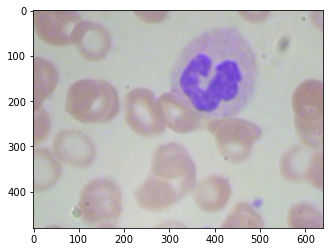

In [16]:
plt.imshow(image)

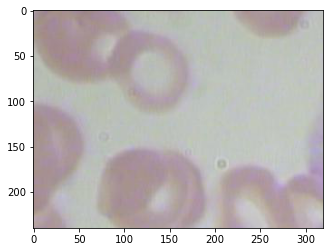

In [17]:
plt.imshow(patch_1) 

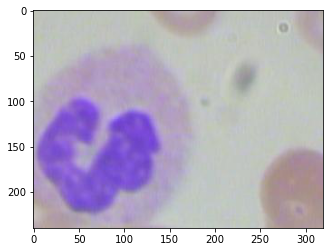

In [18]:
plt.imshow(patch_2)

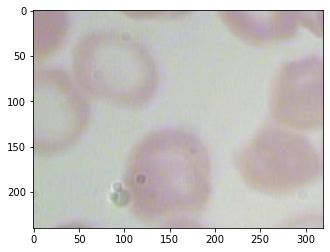

In [19]:
plt.imshow(patch_3)

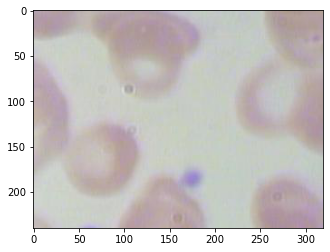

In [20]:
plt.imshow(patch_4)

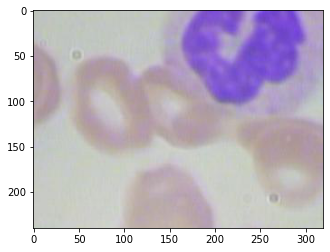

In [21]:
plt.imshow(patch_5)

In [22]:
# for patch_1

Irect_xmin, Irect_ymin = max(row.xmin, patch_1_xmin), max(row.ymin, patch_1_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_1_xmax), min(row.ymax, patch_1_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_1 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_1_xmax - patch_1_xmin)*(patch_1_ymax - patch_1_ymin)
    
    target_1 = Iarea / Parea 
    target_1 = int(target_1 > 0.1)

In [23]:
target_1

0

In [24]:
# for patch_2

Irect_xmin, Irect_ymin = max(row.xmin, patch_2_xmin), max(row.ymin, patch_2_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_2_xmax), min(row.ymax, patch_2_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_2 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_2_xmax - patch_2_xmin)*(patch_2_ymax - patch_2_ymin)

    target_2 = Iarea / Parea 
    target_2 = int(target_2 > 0.1)

In [25]:
# for patch_3

Irect_xmin, Irect_ymin = max(row.xmin, patch_3_xmin), max(row.ymin, patch_3_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_3_xmax), min(row.ymax, patch_3_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_3 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_3_xmax - patch_3_xmin)*(patch_3_ymax - patch_3_ymin)

    target_3 = Iarea / Parea 
    target_3 = int(target_3 > 0.1)

In [26]:
# for patch_4

Irect_xmin, Irect_ymin = max(row.xmin, patch_4_xmin), max(row.ymin, patch_4_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_4_xmax), min(row.ymax, patch_4_ymax)


if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_4 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_4_xmax - patch_4_xmin)*(patch_4_ymax - patch_4_ymin)

    target_4 = Iarea / Parea 
    target_4 = int(target_4 > 0.1)

In [27]:
# for patch_5

Irect_xmin, Irect_ymin = max(row.xmin, patch_5_xmin), max(row.ymin, patch_5_ymin)
Irect_xmax, Irect_ymax = min(row.xmax, patch_5_xmax), min(row.ymax, patch_5_ymax)

if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
    target_5 = 0
else:
    Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
    Parea = (patch_5_xmax - patch_5_xmin)*(patch_5_ymax - patch_5_ymin)
    
    target_5 = Iarea / Parea 
    target_5 = int(target_5 > 0.1)

In [28]:
target_1, target_2, target_3, target_4, target_5

(0, 1, 0, 0, 1)

In [29]:
patch_2.shape

(240, 320, 3)

In [30]:
patch_2

array([[[191, 194, 183],
        [191, 194, 183],
        [191, 194, 183],
        ...,
        [174, 166, 164],
        [173, 165, 162],
        [175, 167, 164]],

       [[191, 194, 183],
        [191, 194, 183],
        [191, 194, 183],
        ...,
        [175, 167, 165],
        [174, 166, 163],
        [176, 168, 165]],

       [[191, 194, 183],
        [191, 194, 183],
        [191, 194, 183],
        ...,
        [175, 167, 165],
        [175, 167, 164],
        [177, 170, 164]],

       ...,

       [[188, 172, 182],
        [186, 170, 180],
        [184, 169, 176],
        ...,
        [177, 156, 155],
        [177, 156, 155],
        [176, 155, 154]],

       [[185, 169, 179],
        [183, 167, 177],
        [181, 166, 173],
        ...,
        [178, 157, 154],
        [177, 156, 153],
        [177, 156, 153]],

       [[182, 166, 176],
        [180, 164, 174],
        [178, 162, 172],
        ...,
        [178, 157, 154],
        [178, 157, 154],
        [178, 157, 154]]

In [31]:
from skimage.transform import resize

In [32]:
patch_2 = resize(patch_2, (224, 224, 3), preserve_range=True)

In [33]:
patch_2

array([[[190.        , 194.        , 183.        ],
        [190.        , 194.        , 183.        ],
        [190.        , 194.        , 183.07142857],
        ...,
        [176.10459184, 166.96173469, 168.31887755],
        [173.67857143, 165.67857143, 163.32142857],
        [173.82142857, 165.82142857, 162.82142857]],

       [[190.        , 194.        , 183.        ],
        [190.        , 194.        , 183.        ],
        [190.        , 194.        , 183.07142857],
        ...,
        [177.        , 167.85714286, 169.19897959],
        [174.68112245, 166.68112245, 164.32397959],
        [174.89285714, 166.97704082, 163.7244898 ]],

       [[190.        , 194.        , 183.        ],
        [190.        , 194.        , 183.        ],
        [190.        , 194.        , 183.07142857],
        ...,
        [177.17857143, 168.20153061, 168.91836735],
        [175.17857143, 167.24234694, 164.57908163],
        [175.96428571, 168.78826531, 163.31632653]],

       ...,

      

In [34]:
patch_2.shape

(224, 224, 3)

In [35]:
# create empty lists
X = []
y = []

# set patch co-ordinates
patch_1_xmin, patch_1_xmax, patch_1_ymin, patch_1_ymax = 0, 320, 0, 240
patch_2_xmin, patch_2_xmax, patch_2_ymin, patch_2_ymax = 320, 640, 0, 240
patch_3_xmin, patch_3_xmax, patch_3_ymin, patch_3_ymax = 0, 320, 240, 480
patch_4_xmin, patch_4_xmax, patch_4_ymin, patch_4_ymax = 320, 640, 240, 480
patch_5_xmin, patch_5_xmax, patch_5_ymin, patch_5_ymax = 160, 480, 120, 360


for idx, row in data.iterrows():
    # read image
    image = plt.imread('../datasets/blood_cell_detection/images/' + row.filename)
    
    # extract patches
    patch_1 = image[patch_1_ymin:patch_1_ymax, patch_1_xmin:patch_1_xmax, :]
    patch_2 = image[patch_2_ymin:patch_2_ymax, patch_2_xmin:patch_2_xmax, :]
    patch_3 = image[patch_3_ymin:patch_3_ymax, patch_3_xmin:patch_3_xmax, :]
    patch_4 = image[patch_4_ymin:patch_4_ymax, patch_4_xmin:patch_4_xmax, :]
    patch_5 = image[patch_5_ymin:patch_5_ymax, patch_5_xmin:patch_5_xmax, :]

    # set default values
    target_1 = target_2 = target_3 = target_4 = target_5 = Iarea = 0

    # figure out if the patch contains the object

    ## for patch_1
    Irect_xmin, Irect_ymin = max(row.xmin, patch_1_xmin), max(row.ymin, patch_1_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_1_xmax), min(row.ymax, patch_1_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_1 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_1_xmax - patch_1_xmin)*(patch_1_ymax - patch_1_ymin)
        
        target_1 = Iarea / Parea 
        target_1 = int(target_1 > 0.1)
        
    ## for patch_2
    Irect_xmin, Irect_ymin = max(row.xmin, patch_2_xmin), max(row.ymin, patch_2_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_2_xmax), min(row.ymax, patch_2_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_2 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_2_xmax - patch_2_xmin)*(patch_2_ymax - patch_2_ymin)

        target_2 = Iarea / Parea 
        target_2 = int(target_2 > 0.1)
        
    ## for patch_3
    Irect_xmin, Irect_ymin = max(row.xmin, patch_3_xmin), max(row.ymin, patch_3_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_3_xmax), min(row.ymax, patch_3_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_3 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_3_xmax - patch_3_xmin)*(patch_3_ymax - patch_3_ymin)

        target_3 = Iarea / Parea 
        target_3 = int(target_3 > 0.1)
        
    ## for patch_4
    Irect_xmin, Irect_ymin = max(row.xmin, patch_4_xmin), max(row.ymin, patch_4_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_4_xmax), min(row.ymax, patch_4_ymax)


    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_4 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_4_xmax - patch_4_xmin)*(patch_4_ymax - patch_4_ymin)

        target_4 = Iarea / Parea 
        target_4 = int(target_4 > 0.1)
        
    ## for patch_5
    Irect_xmin, Irect_ymin = max(row.xmin, patch_5_xmin), max(row.ymin, patch_5_ymin)
    Irect_xmax, Irect_ymax = min(row.xmax, patch_5_xmax), min(row.ymax, patch_5_ymax)

    if Irect_xmax < Irect_xmin or Irect_ymax < Irect_ymin:
        target_5 = Iarea = 0
    else:
        Iarea = np.abs((Irect_xmax - Irect_xmin) * (Irect_ymax - Irect_ymin))
        Parea = (patch_5_xmax - patch_5_xmin)*(patch_5_ymax - patch_5_ymin)
        
        target_5 = Iarea / Parea 
        target_5 = int(target_5 > 0.1)
        
    # resize the patches
    patch_1 = resize(patch_1, (224, 224, 3), preserve_range=True)
    patch_2 = resize(patch_2, (224, 224, 3), preserve_range=True)
    patch_3 = resize(patch_3, (224, 224, 3), preserve_range=True)
    patch_4 = resize(patch_4, (224, 224, 3), preserve_range=True)
    patch_5 = resize(patch_5, (224, 224, 3), preserve_range=True)
    
    # create final input data
    X.extend([patch_1, patch_2, patch_3, patch_4, patch_5])
    
    # create target data
    y.extend([target_1, target_2, target_3, target_4, target_5])
    
# convert these lists to single numpy array
X = np.array(X)
y = np.array(y)

In [36]:
from keras.applications.vgg16 import preprocess_input

In [37]:
X_preprocessed = preprocess_input(X, mode='tf')

TypeError: preprocess_input() got an unexpected keyword argument 'mode'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

## 3. Model Building

In [ ]:
from keras.applications.vgg16 import VGG16

from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

features_train = base_model.predict(X_train)
features_valid = base_model.predict(X_valid)

In [ ]:
max_val = features_train.max()

features_train /= max_val
features_valid /= max_val

In [ ]:
features_train = features_train.reshape(features_train.shape[0],7*7*512)
features_valid = features_valid.reshape(features_valid.shape[0],7*7*512)

In [ ]:
model=Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(features_train, Y_train, epochs=15, batch_size=512,validation_data=(features_valid,Y_valid))

In [ ]:
# get predictions
predictions = model.predict_classes(features_valid).ravel()
prediction_probabilities = model.predict(features_valid).ravel()

# extract validation images
_, valid_x, _, _ = train_test_split(X,y,test_size=0.3, random_state=42)

# get a random index
index = rng.choice(range(len(valid_x)))

# get the corresponding image
img = valid_x[index]

# get the corresponding probability
prob = (prediction_probabilities * 100).astype(int)[index]

# print this probability
print(prob , '% sure that it is WBC')

# show image
plt.imshow(img)

In [ ]:
# extract index of patch
for i in range(X.shape[0]):
    if np.array_equal(X[i, :], img):
        break
        
# get the patch number
patch_num = (i % 5) + 1

# read the corresponding image
image = plt.imread('../datasets/blood_cell_detection/images/' + data.iloc[int(i / 5)].filename)

# plot an empty figure and define axis
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# plot image
ax.imshow(image)

# get minimum and maximum co-ordinates
xmin = eval('patch_' + str(patch_num) + '_xmin')
xmax = eval('patch_' + str(patch_num) + '_xmax')
ymin = eval('patch_' + str(patch_num) + '_ymin')
ymax = eval('patch_' + str(patch_num) + '_ymax')

# get width and height
width = xmax - xmin
height = ymax - ymin

# define a rectangular patch
rect = patches.Rectangle((xmin, ymin), width, height, edgecolor='b', facecolor='none')

# annotate the patch
ax.annotate(xy=(xmin, ymin), s='prob: ' + str(prob) + "%")

# add the rectangular patch
ax.add_patch(rect)
    
# show figure
plt.show()